## Exploratory data analysis of the credit card default data set

In [1]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn.model_selection import train_test_split

alt.data_transformers.enable('data_server') 
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
pd.options.display.max_columns = None

In [3]:
#Read in data set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
credit_card_raw = pd.read_excel(url, skiprows=1)
credit_card_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Introduction

The data set used in this project is of cases of customers credit card default payments in Taiwan sourced by I-Cheng Yeh at the Department of Information Management, Chung Hua University, Taiwan. It was downloaded from the UCI Machine Learning Repository (Dua and Graff 2019) and can be found here. The dataset can be found here. 

Each row in the data set represents variables associated with a customer and his or her credit card information, including a boolean value of default. There are 30000 observations in the data set and 23 features. There are 0 observations with missing values in the data set.

In [4]:
credit_card_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
#Check for duplicated rows
credit_card_raw.duplicated().sum()

0

#### Distribution of the target variable

In [6]:
credit_card_raw['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [7]:
credit_card_raw['default payment next month'].value_counts()/30000

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

We can see in our dataset, we have 78% of customers who default and 22% of customers who do not default. 

### Split the data into train and test set

In [8]:
train_df, test_df = train_test_split(credit_card_raw, test_size=0.3, random_state=42)

In [9]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
28465,28466,240000,2,1,1,40,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1
27622,27623,50000,2,1,2,23,-1,-1,-1,-1,-1,-1,3430,2478,2299,4800,9810,660,2548,2321,4800,9810,660,2980,0
28376,28377,50000,2,2,1,36,2,2,2,2,0,0,46203,45159,49125,47956,43578,35126,0,4700,0,2004,3500,0,0
10917,10918,200000,2,3,1,54,6,5,4,3,2,2,110185,107665,104686,102549,101400,0,0,0,0,0,0,0,0
27234,27235,240000,1,1,1,35,-1,-1,-1,0,-1,-1,2024,2007,21790,17102,13367,22659,2017,21817,1120,13434,22772,22820,0


In [10]:
train_df['default payment next month'].value_counts()

0    16324
1     4676
Name: default payment next month, dtype: int64

In [11]:
train_df.shape

(21000, 25)

In [12]:
train_df['default payment next month'].value_counts()/21000

0    0.777333
1    0.222667
Name: default payment next month, dtype: float64

In [13]:
test_df.shape

(9000, 25)

In [14]:
test_df['default payment next month'].value_counts()/9000

0    0.782222
1    0.217778
Name: default payment next month, dtype: float64

We notice a minor class imbalance, but we will continue experimenting with model training and evaluate if we value a certain metric (i.e. recall) more and observe whether our models are performing poorly on the minority class prediction. We will then consider employing techniques to deal with class imbalance. 

In [15]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15015.693190,167114.270476,1.605905,1.852381,1.550143,35.500238,-0.015429,-0.130143,-0.167714,-0.219048,-0.266429,-0.289429,50934.251286,48953.597571,4.683957e+04,43077.632095,40241.574000,38882.845476,5635.291619,5.972116e+03,5216.177524,4894.010381,4857.917714,5234.388905,0.222667
std,8668.483223,129252.691804,0.488667,0.791593,0.522060,9.227018,1.127920,1.200094,1.193968,1.169854,1.133885,1.155859,73290.682241,70877.985497,6.925942e+04,63894.134836,60508.571457,59158.766807,16864.535074,2.511248e+04,18220.544543,16114.800394,15839.845023,17713.638847,0.416046
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-6.150600e+04,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7459.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3483.500000,2960.500000,2.634500e+03,2313.000000,1746.000000,1272.750000,971.500000,8.797500e+02,390.000000,287.750000,241.000000,148.000000,0.000000
50%,15084.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22321.500000,21084.000000,2.008750e+04,19018.500000,18123.500000,17150.000000,2100.000000,2.011000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22506.500000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66803.500000,63403.500000,5.982850e+04,54671.000000,50527.250000,49496.750000,5011.000000,5.000000e+03,4520.750000,4001.000000,4058.500000,4000.000000,0.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


### Initial EDA

In [16]:
X_train = train_df.drop(columns=["default payment next month"])
X_test = test_df.drop(columns=["default payment next month"])

y_train = train_df["default payment next month"]
y_test = test_df["default payment next month"]

In [17]:
#For now we treat age as a numeric feature, but we will bin it in the future
categorical_features = ["SEX", "EDUCATION", "MARRIAGE", 
                        "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
drop_feature = ["ID"]
numeric_features = set(X_train.columns.tolist()) - set(categorical_features) - set(drop_feature) 

In [18]:
numeric_features = list(numeric_features)
print(numeric_features)

['BILL_AMT4', 'LIMIT_BAL', 'PAY_AMT5', 'BILL_AMT5', 'BILL_AMT1', 'AGE', 'PAY_AMT1', 'PAY_AMT3', 'PAY_AMT2', 'BILL_AMT6', 'PAY_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'PAY_AMT6']


To explore how each feature contributes to the prediction of the default class, we plotted the distribution of each numeric and categorical feature from the train data set and colored the distribution by class (default: blue and not default: orange). 

We see that the distributions below overlap for the two classes and they look quite similar to the human eye. We will need to further explore the features to determine how we perform further analysis and build our models. We may consider dropping the SEX column in order to eliminate the bias in our models. 

In [19]:
def transfer1(x):
    if x == 1: 
        return 'married'
    elif x == 2: 
        return 'single'
    else: 
        return 'others'
    
def transfer2(x):
    if x == 1: 
        return 'graduate school'
    elif x == 2: 
        return 'university'
    elif x == 3: 
        return 'high school'
    else: 
        return 'others'

train_df['default payment next month'] = train_df['default payment next month'].apply(lambda x:'default' if x==1 else 'not default')
train_df['SEX'] = train_df['SEX'].apply(lambda x: 'male' if x==1 else 'female') 
train_df['MARRIAGE'] = train_df['MARRIAGE'].apply(transfer1) 
train_df['EDUCATION'] = train_df['EDUCATION'].apply(transfer2)

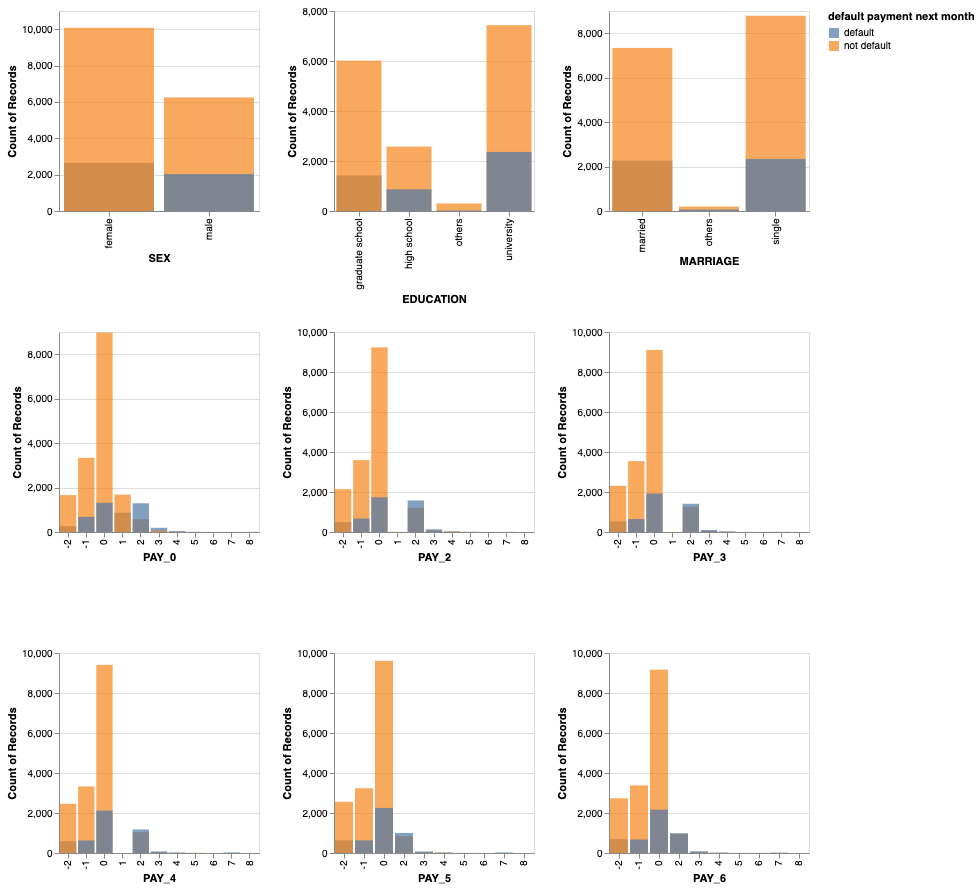

In [20]:
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type='nominal'),
    alt.Y('count()', stack=False),
    color='default payment next month',
    opacity=alt.value(0.7)
).properties( 
    width=200, 
    height=200 
).repeat( 
    categorical_features,
    columns=3
)

#the values of PAY_N need to be labeled correcly 

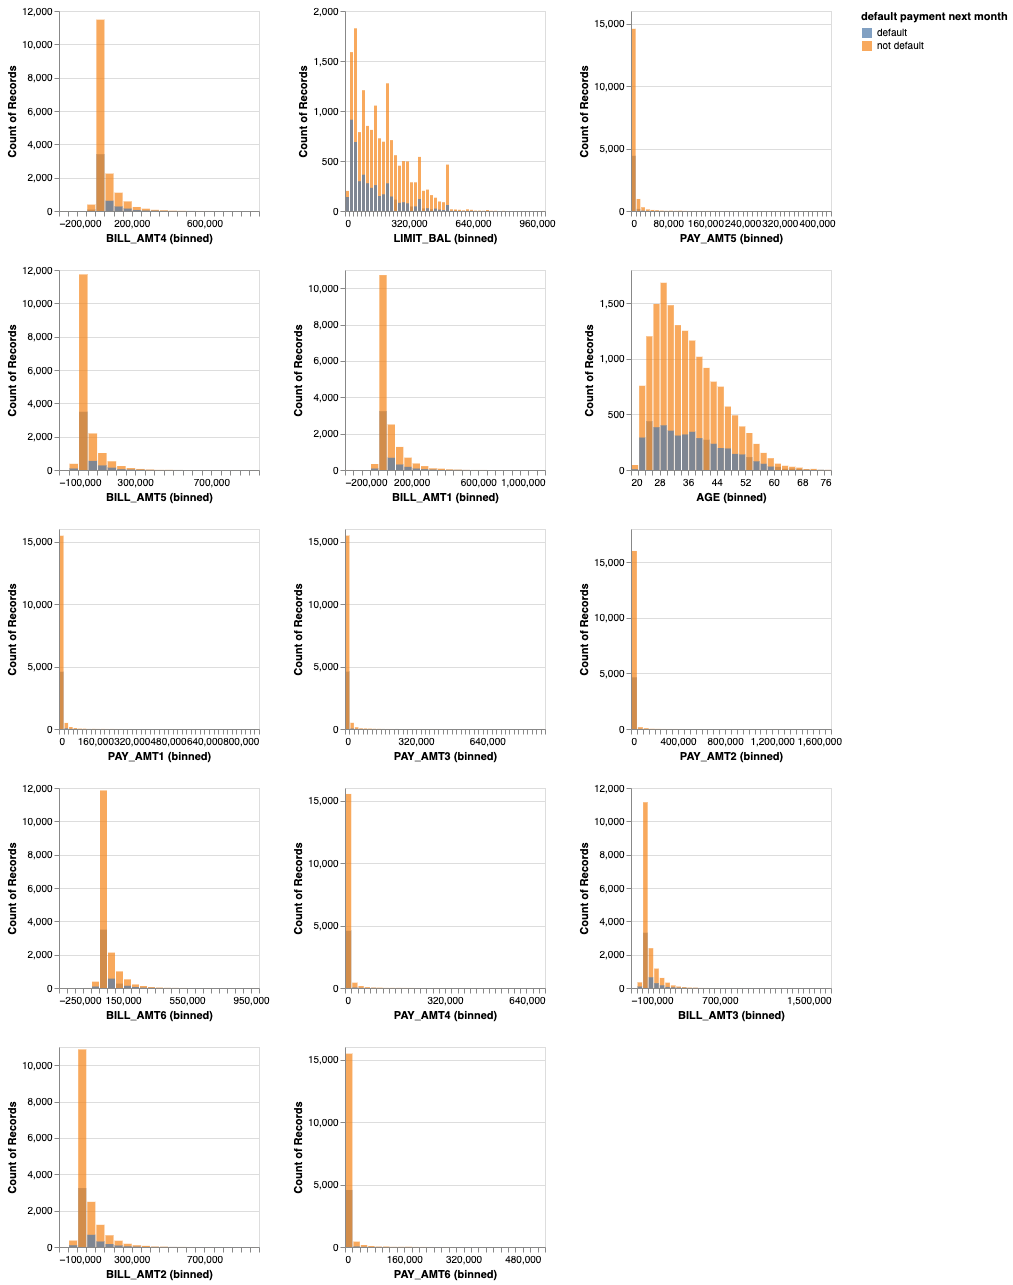

In [21]:
alt.Chart(train_df).mark_bar().encode( 
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=50)), 
    alt.Y('count()', stack=False), 
    color='default payment next month',
    opacity = alt.value(0.7)
).properties( 
    width=200, 
    height=200 
).repeat( 
    numeric_features, columns=3
) 